<a href="https://colab.research.google.com/github/Vaibhavgoel123/Artificial-Intelligence/blob/main/Pytorch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/')

import untitled2

print("Successfully imported untitled2!")

Successfully imported untitled2!


In [9]:
torch.manual_seed(42)

In [10]:
distances = torch.tensor([[1.0],[2.0],[3.0],[4.0]],dtype=torch.float32)
times = torch.tensor([[6.96],[12.11],[16.77],[22.21]],dtype=torch.float32)

In [11]:
model = nn.Sequential(nn.Linear(1,1))

In [12]:
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.1)

In [13]:
for epoch in range(500):
  #Resetting optimizer gradient
  optimizer.zero_grad()
  #Make predictions(Forward pass)
  outputs = model(distances)
  #Loss calculation
  loss = loss_function(outputs, times)
  #Calculate errors(Backward pass)
  loss.backward()
  #Update model parameters
  optimizer.step()
  #Print loss every 50 epochs
  if(epoch+1)%50==0:
    print(f"Epoch {epoch+1}: Loss = {loss.item()}")

Epoch 50: Loss = 0.02637435495853424
Epoch 100: Loss = 0.02546309120953083
Epoch 150: Loss = 0.02541942708194256
Epoch 200: Loss = 0.02541758306324482
Epoch 250: Loss = 0.02541724219918251
Epoch 300: Loss = 0.025417355820536613
Epoch 350: Loss = 0.025417417287826538
Epoch 400: Loss = 0.02541729249060154
Epoch 450: Loss = 0.02541729249060154
Epoch 500: Loss = 0.02541729249060154


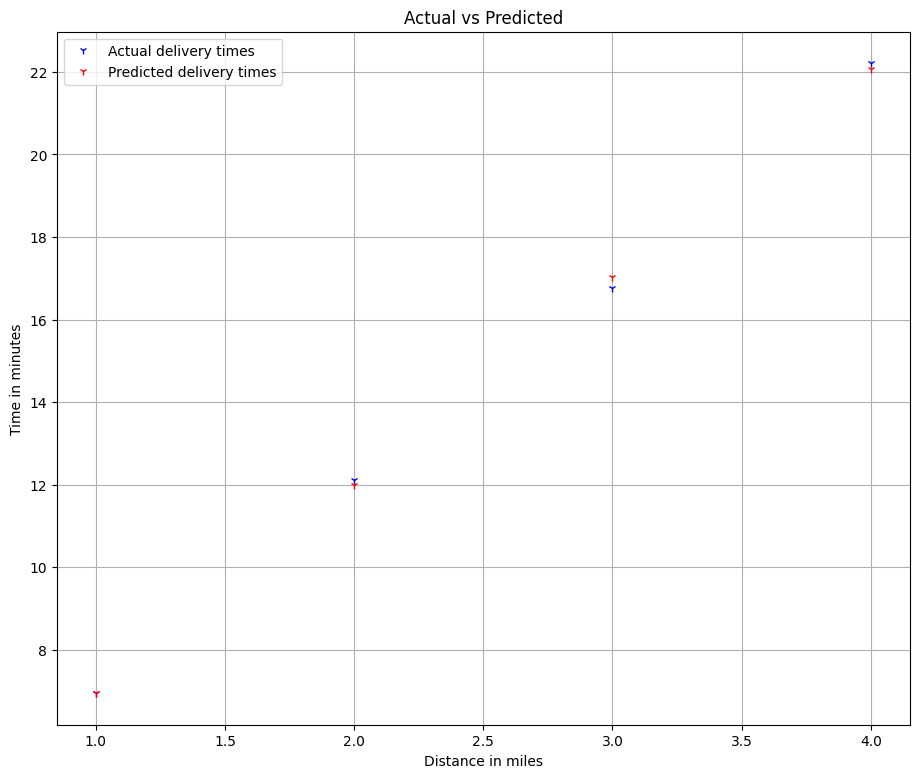

In [15]:
untitled2.plot_results(model, distances, times)

In [16]:
distance_to_predict = 7.0

In [17]:
with torch.no_grad():
  #Convert python variable into 2D Pytorch tensor
  new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)

  #Pass new data to trained model
  predicted_time = model(new_distance)

  #Use .item() to extract scaler values
  print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time.item():.1f} minutes")

  #Use scalar values in conditions
  if predicted_time.item()>30:
    print("\nDecision: Do not take you are likely to be late")
  else:
    print("\nDecision: Take the job. You can make it")


Prediction for a 7.0-mile delivery: 37.2 minutes

Decision: Do not take you are likely to be late


In [18]:
#Access first layer in sequential model
layer = model[0]

#Get weights and bias
weights = layer.weight.data.numpy()
bias = layer.bias.data.numpy()

print(f"Weight: {weights}")
print(f"Bias: {bias}")


Weight: [[5.0409985]]
Bias: [1.9100024]


In [19]:
#Combined dataset: bikes for short distances, car for longer ones
new_distance = torch.tensor([[1.0],[1.5],[2.0],[2.5],[3.0],[3.5],[4.0],[4.5],[5.0],[5.5],
                             [6.0],[6.5],[7.0],[7.5],[8.0],[8.5],[9.0],[9.5],[10.0],[10.5],[11.0],[11.5],
                             [12.0],[12.5],[13.0],[13.5],[14.0],[14.5],[15.0],[15.5],[16.0],[16.5],[17.0],
                             [17.5],[18.0],[18.5],[19.0],[19.5],[20.0]],dtype=torch.float32)

#Combined delivery times
new_times = torch.tensor([[6.96],[9.67],[12.11],[14.56],[16.77],[21.7],[26.52],[32.47],[37.15],[42.35],
                          [46.1],[52.98],[57.76],[61.29],[66.15],[67.63],[69.45],[71.57],[72.8],[73.88],
                          [76.34],[76.38],[78.34],[80.07],[81.86],[84.45],[83.98],[86.55],[88.33],[86.83],
                          [89.24],[88.11],[88.16],[91.77],[92.27],[92.13],[90.73],[90.39],[92.98]],dtype=torch.float32)

In [20]:
with torch.no_grad():
  predictions = model(new_distance)

In [21]:
new_loss = loss_function(predictions, new_times)
print(f"Loss on new, combined data: {new_loss.item():.2f}")

Loss on new, combined data: 176.32


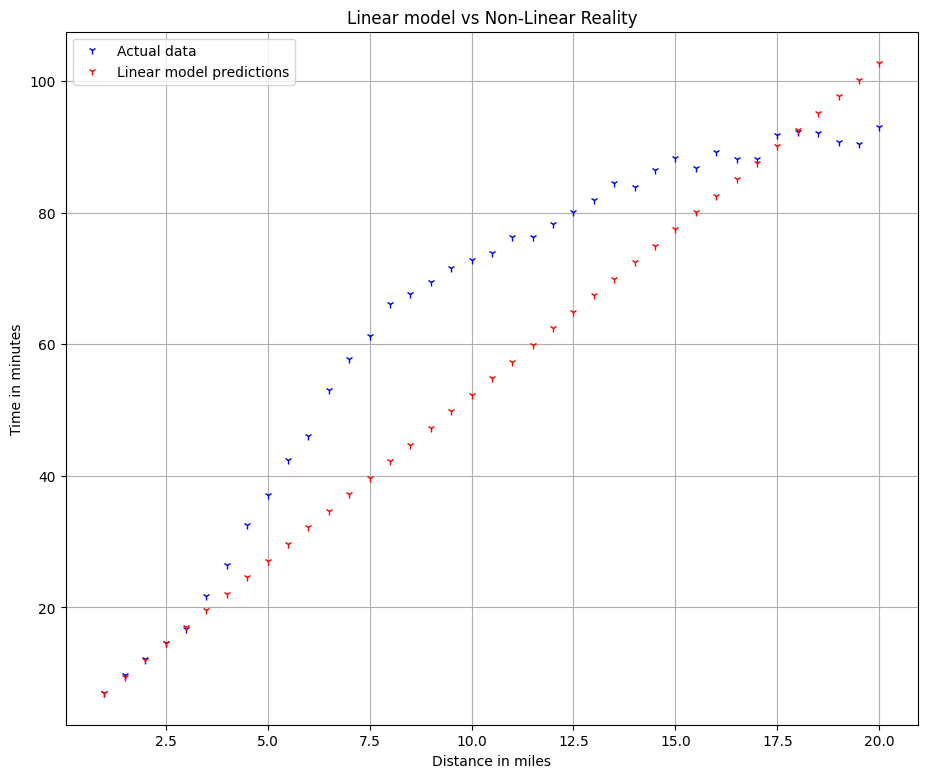

In [22]:
untitled2.plot_nonlinear_comparison(model, new_distance, new_times)